In [42]:
import networkx as nx
import matplotlib.pyplot as plt
# import networkx.algorithms.community as nx_comm
import community as community_louvain

from collections import defaultdict

from community import partition_at_level
from networkx.algorithms.community import k_clique_communities

from cdlib import algorithms, viz, evaluation

In [43]:
fig_size = (4, 4)

In [44]:
def plot_communities(G, nodes_per_community):
    fig, axis = plt.subplots(figsize=(4 * len(nodes_per_community), 4), nrows=1, ncols=len(nodes_per_community))
    for comm_id, nodes in enumerate(nodes_per_community):

        S = G.subgraph(nodes)
        center_nodes = nx.center(S)


        pos = nx.kamada_kawai_layout(G)
        nx.draw_networkx_labels(S,pos=pos, ax=axis[comm_id])
        nx.draw_networkx_nodes(S, pos=pos, ax=axis[comm_id])
        nx.draw_networkx_nodes(S, pos=pos, nodelist=center_nodes, node_color='red', ax=axis[comm_id])
        nx.draw_networkx_edges(S, pos=pos, ax=axis[comm_id]);    

# Loading plot

Karate Club is a popular dataset in the field of social network analysis.

It consists of 34 vertices and 78 edges that represent interactions between members of the karate club in the USA. 

In [45]:
G = nx.karate_club_graph()

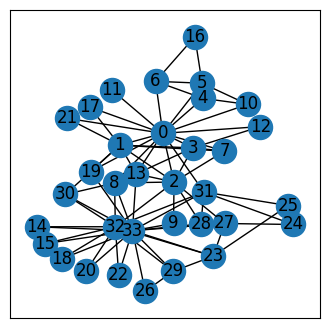

In [46]:
fig = plt.figure(figsize=fig_size)
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_labels(G,pos=pos)
nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx_edges(G, pos=pos);

# Detecting communities

In [47]:
clusters=community_louvain.community_louvain.best_partition(G, random_state=42)
# clusters = nx.community.girvan_newman(G)
print(clusters)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 2, 5: 2, 6: 2, 7: 0, 8: 3, 9: 3, 10: 2, 11: 0, 12: 0, 13: 0, 14: 3, 15: 3, 16: 2, 17: 0, 18: 3, 19: 0, 20: 3, 21: 0, 22: 3, 23: 3, 24: 1, 25: 1, 26: 3, 27: 3, 28: 1, 29: 3, 30: 3, 31: 1, 32: 3, 33: 3}


In [48]:
communities = defaultdict(list)
for key, val in sorted(clusters.items()):
    communities[val].append(key)
    
nodes_per_community = list(communities.values())

In [49]:
# nodes_per_community = list(map(list, clusters))

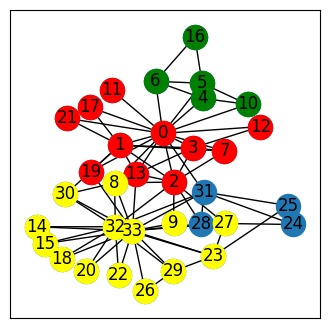

In [50]:
fig = plt.figure(figsize=fig_size)
nx.draw_networkx_labels(G,pos=pos)
nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_per_community[0], node_color='red')
nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_per_community[1], node_color='green')
nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_per_community[2], node_color='yellow')
nx.draw_networkx_edges(G, pos=pos);

# Validating

The **coverage** of a partition is the ratio of the number of intra-community edges to the total number of edges in the graph.

The **performance** of a partition is the number of intra-community edges plus inter-community non-edges divided by the total number of potential edges.

In [51]:
coverage, performance = nx.community.partition_quality(G, nodes_per_community)
coverage, performance

(0.7564102564102564, 0.7825311942959001)

**Modularity** (Q) is a measure of the structure of networks or graphs which measures the strength of division of a network into modules (also called groups, clusters or communities). 

Networks with high modularity have dense connections between the nodes within modules but sparse connections between nodes in different modules.

Source: https://en.wikipedia.org/wiki/Modularity_(networks)

In [52]:
Q = nx.community.modularity(G, nodes_per_community)
Q

0.4151051939513477

Modulatiry (Q) greater than 0.3-0.7 means significant community structure.

# Ego plot for each community

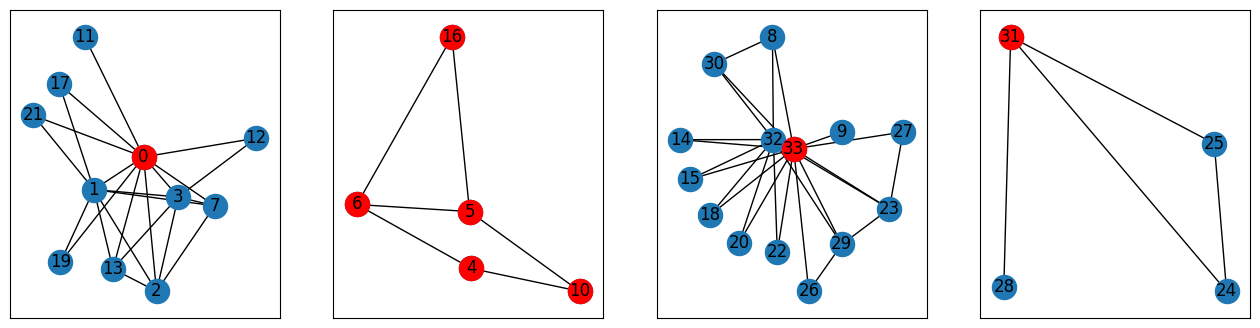

In [53]:
plot_communities(G, nodes_per_community)

# Clique communities

Clique communities are a type of community structure in networks, where nodes within the same community are fully connected to each other, forming a complete subgraph. In other words, every node in a clique community is directly connected to every other node in the same community.

More: https://en.wikipedia.org/wiki/Clique_(graph_theory)

In [54]:
nodes_per_community = list(map(list, k_clique_communities(G, 4)))

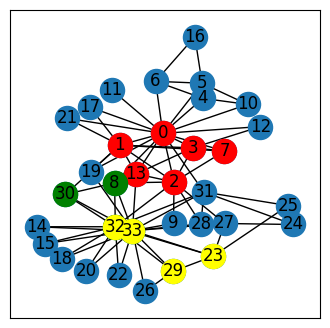

In [55]:
fig = plt.figure(figsize=fig_size)
nx.draw_networkx_labels(G,pos=pos)
nx.draw_networkx_nodes(G, pos=pos)
nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_per_community[0], node_color='red')
nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_per_community[1], node_color='green')
nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes_per_community[2], node_color='yellow')
nx.draw_networkx_edges(G, pos=pos);

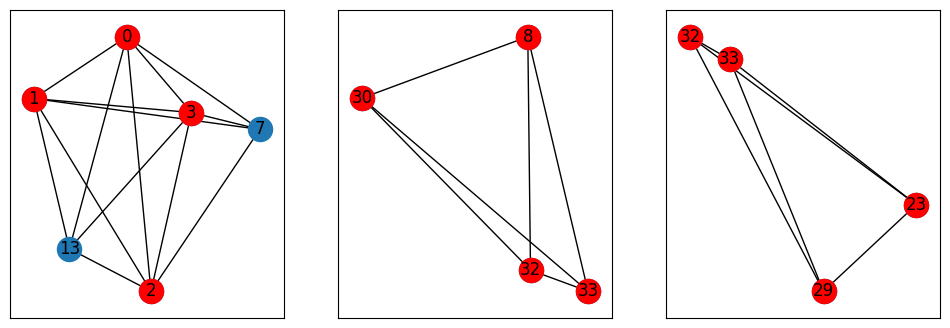

In [56]:
plot_communities(G, nodes_per_community)

# Louvain Algorithm

The Louvain algorithm is a popular community detection algorithm in graph theory. It is a hierarchical clustering method that optimizes modularity, a quality function that measures the strength of division of a network into communities. The algorithm operates in two phases, first at the node level and then at the community level, to iteratively optimize modularity.

In [57]:
coms = algorithms.louvain(G, weight='weight', resolution=1.)

In [58]:
coms.communities

[[0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21],
 [8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33],
 [23, 24, 25, 27, 28, 31],
 [4, 5, 6, 10, 16]]

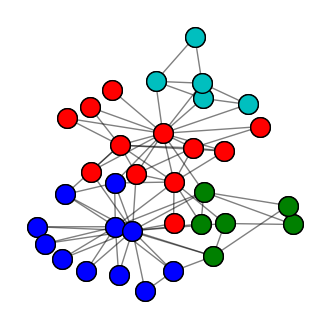

In [59]:
pos = nx.kamada_kawai_layout(G)
viz.plot_network_clusters(G, coms, pos, figsize=fig_size);

## Modularity density

The idea of this metric is to include the information about community size into the expected density of community to avoid the negligence of small and dense communities.

In [60]:
mod = evaluation.modularity_density(G, coms)
mod

FitnessResult(min=None, max=None, score=7.463636363636365, std=None)

In [61]:
Q = nx.community.modularity(G, coms.communities)
Q

0.41880341880341876

# Overlapping Communities (BIGCLAM)

BIGCLAM (Cluster Affiliation Model for Big Networks) Algorithm to detect overlapping communities in a given network.

In [62]:
coms = algorithms.big_clam(G)

In [63]:
coms.communities

[[9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
 [0, 1, 2, 3, 7, 12, 13, 17, 19, 21],
 [4, 5, 6, 8, 10, 11, 16]]

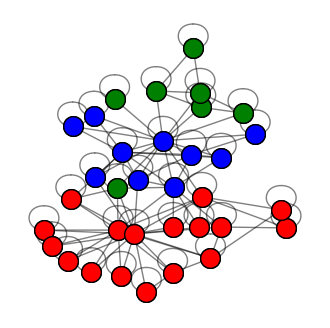

In [64]:
pos = nx.kamada_kawai_layout(G)
viz.plot_network_clusters(G, coms, pos, figsize=fig_size, );

In [65]:
Q = nx.community.modularity(G, coms.communities)
Q

0.4522879464285715

In [66]:
mod = evaluation.modularity_density(G, coms)
mod

FitnessResult(min=None, max=None, score=12.303361344537816, std=None)